- 활성화 함수 : 입력 신호의 총합을 출력 신호로 변환하는 함수
- 계단 함수 : 임계값을 경계로 출력이 바뀌는 함수
- 퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다.

## 3.2.1 시그모이드 함수
신경망에서 자주 이용하는 활성화 함수
$$h(x) = \frac{1}{1+e^{-x}}$$

## 3.2.2 계단 함수 구현하기

In [1]:
import numpy as np

# x : numpy 배열
def step_function(x):
    y = x > 0  # y : 조건에 맞으면 true, 틀리면 false np.array로 변환
    print("y :",y)
    return y.astype(np.int)  # astype() : 원하는 자료형으로 변환
step_function(np.array([1,2,-1]))

y : [ True  True False]


array([1, 1, 0])

## 3.2.3 계단 함수의 그래프

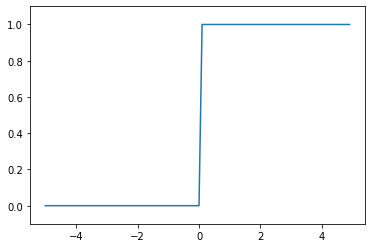

In [2]:
import matplotlib.pyplot as plt
def step_fc(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_fc(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

## 3.2.4 시그모이드 함수 구현하기

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.array([-1. , 1., 2.])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

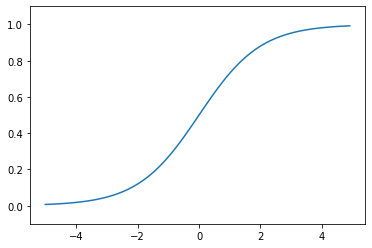

In [4]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

## 3.2.7 ReLU 함수
- 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수
- 최근에 신경망 분야에서 이용하는 함수
$$h(x) = \begin{cases}
x & {(x > 0)}\\
0 & {(x \leq 0)}
\end{cases} $$

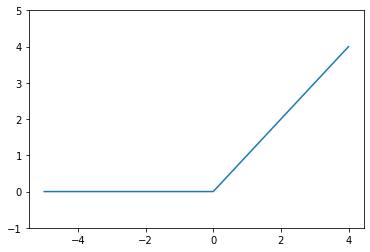

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
def relu(x):
    return np.maximum(0,x)
x = np.arange(-5.,5.)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1.,5)
plt.show()

# 3.3 다차원 배열의 계산
넘파이의 다차원 배열을 사용한 계산법을 숙달하면 신경망을 효율적으로 구현할 수 있다.

## 3.3.1 다차원 배열

In [6]:
A = np.array([1,2,3,4])
print(A)
print("차원수 :",np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
차원수 : 1
(4,)
4


In [7]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)
print("차원수 :",np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
차원수 : 2
(3, 2)


## 3.3.2 행렬의 곱

In [8]:
A = np.array([[1,2], [3,4]])
print(A.shape)
B = np.array([[5,6], [7,8]])
print(B.shape)
C = np.dot(A,B)   # np.dot(A,B) : 행렬 곱셈 A x B를 실시한다
print(C)

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


## 3.3.3 신경망에서의 행렬 곱

In [9]:
X = np.array([1,2])
print(X.shape)
W = np.array([[1,3,5], [2,4,6]])
print(W.shape)
Y = np.dot(X,W)
print(Y)

(2,)
(2, 3)
[ 5 11 17]


# 3.4 3층 신경망 구현하기
3층 신경망 : 입력층(0층)은 2개, 첫번째 은닉층(1층)은 3개, 두번째 은닉층(2층)은 2개, 출력층(3층)은 2개의 뉴런으로 구성된다.

## 3.4.2 각 층의 신호 전달 구현하기

### 입력층에서 1층으로의 신호 전달 과정

In [13]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(X.shape)  # (2,)
print(W1.shape) # (2,3)
print(B1.shape) # (3,)

A1 = np.dot(X,W1) + B1
print(A1)
Z1 = sigmoid(A1)   # Z1 : A1을 시그모이드 함수를 활용해 활성화함수 처리를 한 것.
print(Z1)

(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


### 1층에서 2층으로의 신호 전달
1층의 출력 Z1이 2층의 입력이 된다는 점을 제외하면 조금 전의 구현과 똑같다.

In [15]:
W2 = np.array([[0.1,0.4], [0.2,0.5], [0.3,0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape)  # (3,)
print(W2.shape)  # (3,2)
print(B2.shape)  # (2,)

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


### 2층에서 출력층으로의 신호 전달

In [17]:
# 이 예에서는 항등함수인 identity_functnion을 굳이 정의할 필요는 없지만,
# 그동안의 흐름과 통일하기 위해 구현
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3)  # 혹은 Y = A3
print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


## 3.4.3 구현 정리

In [18]:
# 가중치(W)와 편향(b)을 초기화하고 이들을 딕셔너리 변수인 network에 저장
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array(np.array([0.1, 0.2]))
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2]) 
    
    return network

# 입력신호를 출력으로 변환하는 처리 과정을 모두 구현. 순방향으로 신호 전달되니 forward라 명명.
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# 3.5 출력층 설계하기

## 3.5.1 소프트맥스 함수 구현하기
$$ y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} $$
$exp(x) = e^x$  
$n$ : 출력층의 뉴런수  
$y_k$ : k번째 출력

In [24]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
a = np.array([0.3, 2.9, 4.0])
b = np.array([1010,1000,900])
print(softmax(a))
print(softmax(b)) 
# 값이 너무 크면 무한대에 가까운 값이 나오고 이 값끼리 나눗셈을 하면 결과 수치가 불안정해진다.

[0.01821127 0.24519181 0.73659691]
[nan nan nan]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


## 3.5.2 소프트맥스 함수 구현 시 주의점
값이 너무 크면 무한대에 가까운 값이 나오고 이 값끼리 나눗셈을 하면 결과 수치가 불안정해진다.

개선한 수식
$$ y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} = \frac{Cexp(a_k)}{C\sum_{i=1}^n exp(a_i)} $$
$$ = \frac{exp(a_k + lnC)}{\sum_{i=1}^n exp(a_i + lnC)}$$
$$ = \frac{exp(a_k + C')}{\sum_{i=1}^n exp(a_i + C')}$$
=> 소프트맥스의 지수 함수 를 계산할 때 어떤 정수를 더해도 결과는 바뀌지 않는다!!


따라서, C'에 어느 값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 보통 입력 신호 중 최댓값을 이용한다.

In [26]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))

c = np.max(a)
print(np.exp(a-c) / np.sum(np.exp(a-c)))

[nan nan nan]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [42]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y
x = np.array([1000,900,1032])
result = softmax(x)
print(result)
print(np.sum(result))

[1.26641655e-14 4.71116580e-58 1.00000000e+00]
1.0


## 3.5.3 소프트맥스 함수의 특징
- 소프트맥스 함수 출력의 총합은 1이다. 덕분에 함수의 출력을 '확률'로 해석할 수 있다.
- 소프트맥스 함수를 적용해도 각 원소의 대소 관계가 바뀌지 않기 때문에 결과적으로 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 된다.

## 3.5.4 출력층의 뉴런 수 정하기
- 출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다.
- 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다.

# 3.6 손글씨 숫자 인식

### 3.6.1 MNIST 데이터셋

In [3]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

# (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
# normalize : 입력 이미지의 픽셀값을 0.0~1.0 사이의 값으로 정규화할지를 정한다.
# False로 설정하면 입력 이미지의 픽셀은 원래 값 그대로 0~255 사이 값 유지.

# flatten : 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지 정한다.
# False : 1x28x28의 3차원 배열 / True : 784개의 원소로 이뤄진 1차원 배열로 저장.

# one_hot_label : 원-핫 인코딩 형태로 저장할지를 정한다. ex) [0,0,1,0,0,0,0]
# False : '7'이나 '2'와 같이 숫자 형태의 레이블 저장 / True : 원-핫 인코딩 적용.

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape)  # (10000, 784)
print(t_test.shape)  # (10000,)

(60000, 1, 28, 28)
(60000,)
(10000, 1, 28, 28)
(10000,)


In [7]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape)            # (784,)
img = img.reshape(28, 28)   # 원래 이미지의 모양으로 변형
print(img.shape)            # (28, 28)

img_show(img)

5
(784,)
(28, 28)
